In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from lib.functions import LogisticRegression
import lib.load_datasets as load_datasets
from compressors.markov_compressors import *
from compressors.other_compressors import *
from lib.gradient_descent import *

In [2]:
X, y = load_datasets.dataset_to_X_y('diabetes.csv', normalize=True, nrows=500)
# X, y = make_blobs(n_samples=500, centers=2, n_features=5, random_state=0)
function = LogisticRegression(X, y)
dim = function.getDimention()
alpha = 0.0001 # for diabetes
# alpha = 0.04 # for make_blobs
print(dim)

9


In [3]:
base_experiments = [
    compressedGD(function, compressor=NoneCompressor(dim=dim), alpha=alpha),
    compressedGD(function, compressor=RandKCompressor(dim=dim, alpha=0.33), alpha=alpha),
    compressedGD(function, compressor=MultiplicationPenaltyCompressor(dim=dim, alpha=0.33, penalty=0.7), alpha=alpha),
]

In [4]:
new_experiments = [
    compressedGD(function, compressor=SubtractionPenaltyCompressor(dim=dim, alpha=0.33, penalty=0.25), alpha=alpha),
    compressedGD(function, compressor=SubtractionPenaltyCompressor(dim=dim, alpha=0.5, penalty=0.5), alpha=alpha),
    compressedGD(function, compressor=ExpSmoothingCompressor(dim=dim, alpha=0.33, beta=0.2), alpha=alpha),
    
]

In [5]:
experiments = base_experiments + new_experiments
experiments.sort(key=lambda exp : exp['coords'][-1])

table = [
    ["compression", "num_iter", "transmitted coordinates"],
    *[
        [exp['name'], exp['num_iter'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

----------------------------------------------  --------  -----------------------
compression                                     num_iter  transmitted coordinates
RandK, alpha=0.33                               10211     20422
MultiplicationPenalty, alpha=0.33, penalty=0.7  10359     20718
SubtractionPenalty, alpha=0.33, penalty=0.25    10359     20718
ExpSmoothing, alpha=0.33, beta=0.2              10359     20718
SubtractionPenalty, alpha=0.5, penalty=0.5      5184      20736
Without compression                             2309      20781
----------------------------------------------  --------  -----------------------


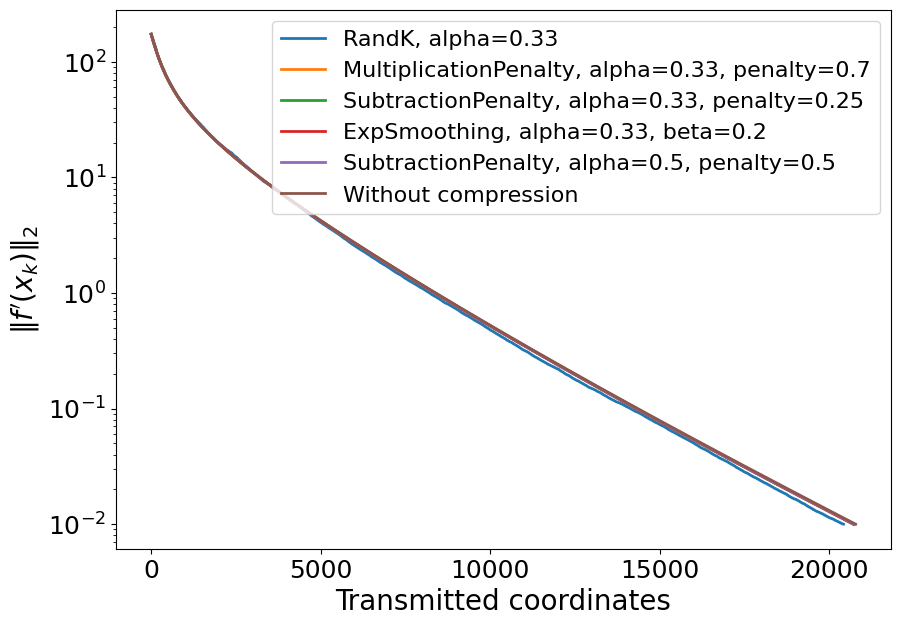

In [6]:
plt.figure(figsize=(10, 7))
for exp in experiments:
    plt.semilogy(
        exp['coords'],
        [grad_norm for grad_norm in exp['gradients']],
        label=exp['name'],
        linewidth=2
    )
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)